In [2]:
import pdb

# Insertion sort
## Initial analysis
- Best case: A linear function of n: $\Theta (n)$
- Worst case: A quadratic function of n: $\Theta(n^2)$
- With insertion sort the average case is the same as the worst case


In [3]:
import random                          
B = random.sample(range(0, 1000), 20)
print("input:  ", B)

def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i = i - 1
        A[i+1] = key
    return A

print("output: ", insertion_sort(B))

input:   [838, 997, 202, 458, 473, 148, 370, 1, 407, 817, 670, 803, 872, 290, 744, 584, 244, 768, 965, 655]
output:  [1, 148, 202, 244, 290, 370, 407, 458, 473, 584, 655, 670, 744, 768, 803, 817, 838, 872, 965, 997]


# Selection sort
Assuming constant time:

$ 5n + (n-1)n + (n-1)n + (n-1)n + 1 $

$ \implies 5n + 3(n-1)n  + 1 $

$ \implies n^2 + 2n + 1 $

$\therefore$ the complexity is $\Theta \ (n^2)$

In [15]:
import random
# Selection sort
B = random.sample(range(0, 100), 10)
# B = [3, 4, 1, 5]
print("input:  ", B)

def selection_sort(A):                       # times
    for j in range(0, len(A)):                # n
        min_index = j                         # n
        for i in range(j+1, len(A)-1):        # (n-1) * n
            if A[i] < A[min_index]:           # (n-1) * n
                min_index = i                 # (n-1) * n (worst case)
        tmp = A[j]                            # n 
        A[j] = A[min_index]                   # n
        A[min_index] = tmp                    # n
    return A                                  # 1

# pdb.run('print("output: ", selection_sort(B))')
print("output: ", selection_sort(B))

input:   [16, 39, 15, 95, 63, 89, 1, 10, 20, 52]
output:  [1, 10, 15, 16, 20, 39, 63, 89, 95, 52]


# Linear search
- Average complexity target is halfway along array: $\Theta \ (\frac{n+1}{2})$
- Worst case. The scenario where the target is not in the array:         $\Theta \ (n)$ 

## Loop invariant for linear search
### Initialisation:
A list is initialised to contain all instances of the target element. If the list is empty at the end the search will return "Not found".
### Maintenance:
The if statement checks each value against the target value. If it is found it is stored.
### Terminations:
The for loop terminates when it when it reaches the end of its range. There is no other reason for it to end as it will find all instances of the value.

In [25]:
import random
# Linear search
sample_size = 10000
B = random.sample(range(0, sample_size), sample_size)
B = [2, 3, 4, 5, 4, 3, 2, 2, 2, 3]
target_val = random.randint(-sample_size, sample_size)
target_val = 2

def linear_search(A, target):
    found = []
    for i, val in enumerate(A):
        if(val==target):
            print("Found %d at index %d"%(val, i))
            found.append( {"Value": val, "Index": i} )
    if(len(found)==0):
        return "Value not in list"

linear_search(B, target_val)

Found 2 at index 0
Found 2 at index 6
Found 2 at index 7
Found 2 at index 8


# Merge sort

## Commented C implementation 
```c
#include <math.h>
#include <stdio.h>
// merge procedure
void MERGE(int arr[], int low, int mid, int high){
    int n1 = mid - low + 1; // length of first subarray
    int n2 = high - mid;    // length of second subarray  
    float L[n1+1], R[n2+1]; // initialise subarrays
    for(int i = 0; i < n1; i++){
        L[i] = arr[low + i]; // copy values into 1st subarray
    }
    for(int j = 0; j < n2; j++){
        R[j] = arr[mid + j+1]; // copy values into 2nd subarray
    }
    L[n1] = INFINITY; // set sentinal at end of array
    R[n2] = INFINITY; // ditto
    int i = 0, j = 0; // initialise counter for each subarray
    for(int k = low; k <= high; k++){ // loop over input array
        if(L[i] <= R[j]){ // if left is less than right
            arr[k] = L[i]; // copy in left
            i = i + 1; // increment left counter
        }
        else {
            arr[k] = R[j]; // if right is greater than left
            j = j + 1; // increment right counter
        }
    }
} 
// main mergesort function
void MERGE_SORT(int arr[], int low, int high){
    if(low < high){ // if low index is less than high index
        int mid = floor((low+high)/2); // calculate mid point
        MERGE_SORT(arr, low, mid); // recursive merge_sort for left subarray
        MERGE_SORT(arr, mid+1, high); // recursive merge sort for right subarray
        MERGE(arr, low, mid, high); // merge left and right
    } 
}
// print array utility function
void printArr(int arr[], int size){
    for(int i = 0; i < size; i++)
        printf("%d ", arr[i]);
    printf("\n");
} 
// main procedure
int main()
{
    int arr[5] = {4, 3, 1, 8, 7}; // input
    int arr_size = sizeof(arr) / sizeof(arr[0]); // calculate length
    printArr(arr, arr_size); // print input
    MERGE_SORT(arr, 0, arr_size-1); // sort, with first and last indices
    printArr(arr, arr_size); // print output
    return 0; // exit
} 
```

## Analysing divide and conquer algorithms

### D&c time recurrence

$ T(n) = \Theta (1)\ \ $  if $n <= c,$

$\ \ \ \ \ \ \ \ = aT(\frac{n}{b}) + D(n) + C(n) $ otherwise.

### Analysis of merge sort
**Divide**: The divide step just computes the middle of the subarray, which takes constant time. Thus, $D(n) = \Theta(1)$

**Conquer**: We recursively solve two subproblems, each of size $n=2$ , which contributes $2T(\frac{n}{2})$, to the running time.

**Combine**: We have already noted that the _MERGE_ procedure on an n-element subarray takes time $\Theta(n)$, and so $C(n) = \Theta(n)$ 

For now without explanation
it is:

$\Theta(n\ log_2 n)$

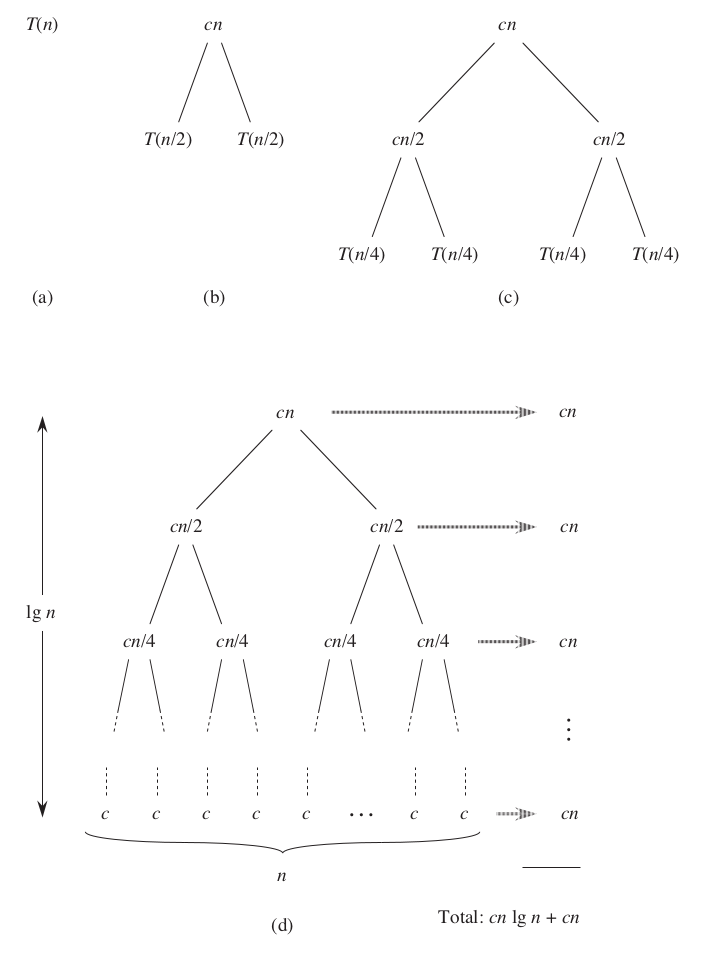